In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [12]:
df_animals = pd.read_csv("C:\\Users\\suman\\Desktop\\Assignment\\DS Assignment\\Zoo.csv")

In [7]:
df_animals.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


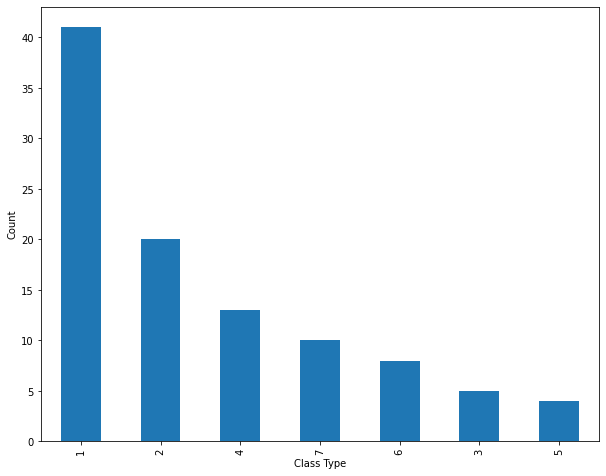

In [13]:
plt.figure(figsize=(10,8));
df_animals.class_type.value_counts().plot(kind="bar");
plt.xlabel('Class Type');
plt.ylabel("Count");
plt.plot();

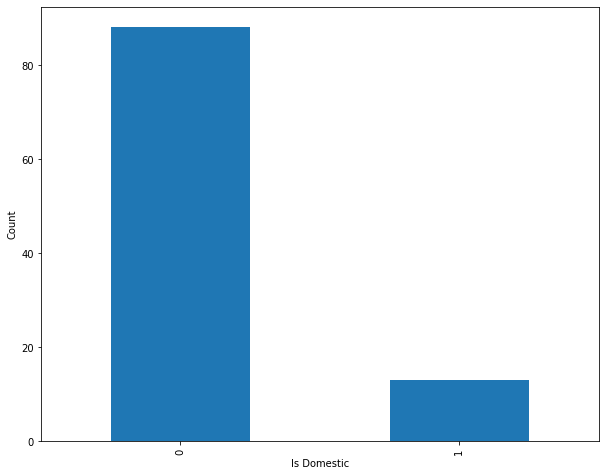

In [14]:
plt.figure(figsize=(10,8));
df_animals.domestic.value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot();

In [15]:
pd.crosstab(df_animals.class_type, df_animals.domestic)

domestic,0,1
class_type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


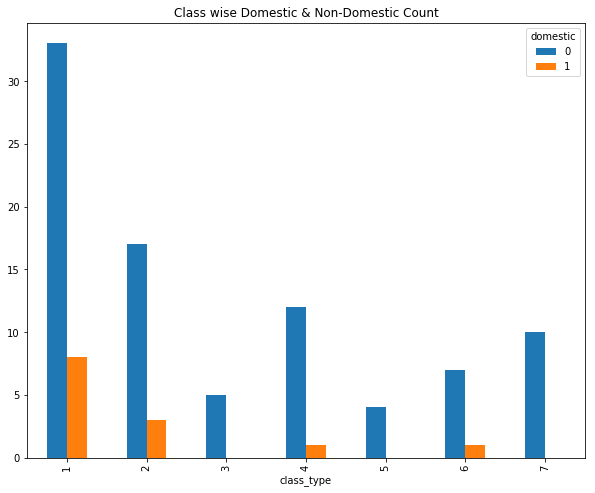

In [10]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(df_animals.class_type, df_animals.domestic).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [16]:
df_animals.milk.value_counts()

0    60
1    41
Name: milk, dtype: int64

In [17]:
pd.crosstab(df_animals.class_type, df_animals.milk)

milk,0,1
class_type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


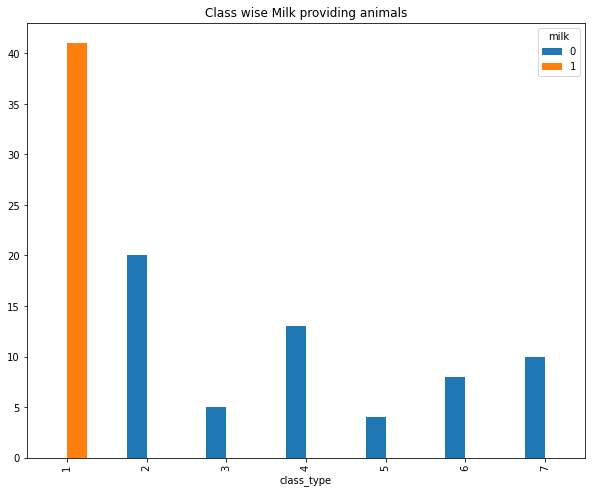

In [18]:
pd.crosstab(df_animals.class_type, df_animals.milk).plot(kind="bar", title="Class wise Milk providing animals", figsize=(10, 8));

In [19]:
df_animals[(df_animals.milk==1)].shape[0]

41

In [20]:
df_animals[df_animals.class_type == 1].shape[0]

41

In [21]:
df_animals.aquatic.value_counts() 

0    65
1    36
Name: aquatic, dtype: int64

In [22]:
df_animals[df_animals.aquatic==1].class_type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: class_type, dtype: int64

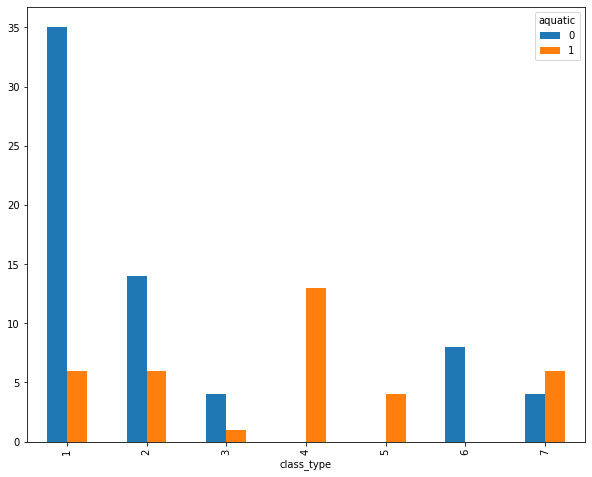

In [23]:
pd.crosstab(df_animals.class_type, df_animals.aquatic).plot(kind="bar", figsize=(10, 8));

In [24]:
df_animals.venomous.value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [25]:
pd.crosstab(df_animals.class_type, df_animals.venomous)

venomous,0,1
class_type,,
1,41,0
2,20,0
3,3,2
4,12,1
5,3,1
6,6,2
7,8,2


<AxesSubplot:xlabel='class_type'>

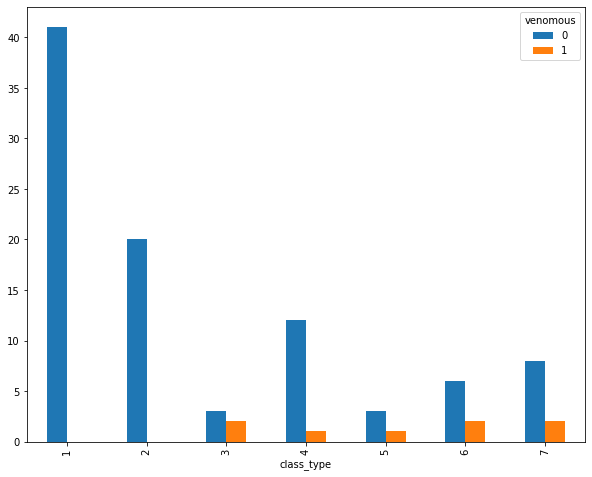

In [26]:
pd.crosstab(df_animals.class_type, df_animals.venomous).plot(kind="bar", figsize=(10, 8))

In [27]:
df_animals.shape

(101, 18)

In [28]:
X=df_animals.loc[:, ["milk", "backbone", "toothed", "venomous", "domestic", "aquatic"]].values

In [29]:
y = df_animals.iloc[:, 17].values

In [30]:
y.shape

(101,)

In [31]:
X.shape

(101, 6)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
clf = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2) 

In [36]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = clf.predict(X_test)

In [38]:
y_pred

array([4, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 6, 4, 6, 1, 6, 2, 4, 2, 3,
       1, 2, 1, 1], dtype=int64)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [40]:
print("Accuracy of KNN Regression:",accuracy_score(y_test, y_pred))

Accuracy of KNN Regression: 0.9230769230769231


In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf_log = LogisticRegression(random_state=0)

In [43]:
clf_log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [44]:
y_pred_log = clf_log.predict(X_test)

In [45]:
print("Accuracy of Logistic Regression Classifier:",accuracy_score(y_test, y_pred_log))

Accuracy of Logistic Regression Classifier: 0.9230769230769231
